In [ ]:
 Heart-Disease-Prediction By Indhira sivasakthi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns, na_values='?')

In [ ]:
# Dataset Overview
print("Dataset Shape:", df.shape)


Dataset Shape: (303, 14)


In [ ]:
print("\nDataset Description:\n", df.describe())



Dataset Description:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std 

In [ ]:
print("\nFirst few rows:\n", df.head())



First few rows:
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [ ]:
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [ ]:
# Handling Missing Values
df.fillna(df.mean(), inplace=True)

In [ ]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)


Target Variable Distribution (Binary Classification):


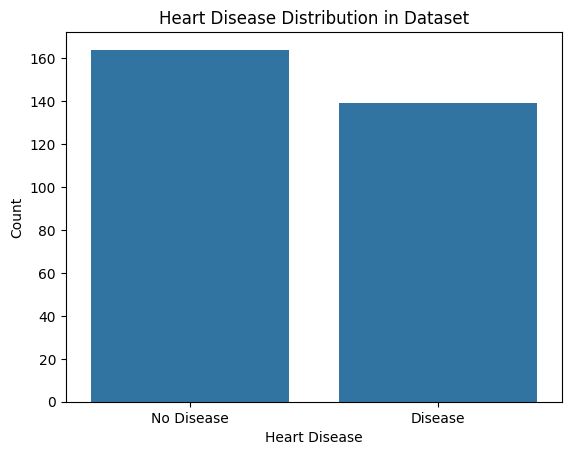

In [ ]:
# Convert multi-class target (0,1,2,3,4) into binary (0 = No Disease, 1 = Disease Present)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# Now visualize the corrected target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt

print("\nTarget Variable Distribution (Binary Classification):")
sns.countplot(x=df["target"])
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Heart Disease Distribution in Dataset")
plt.show()


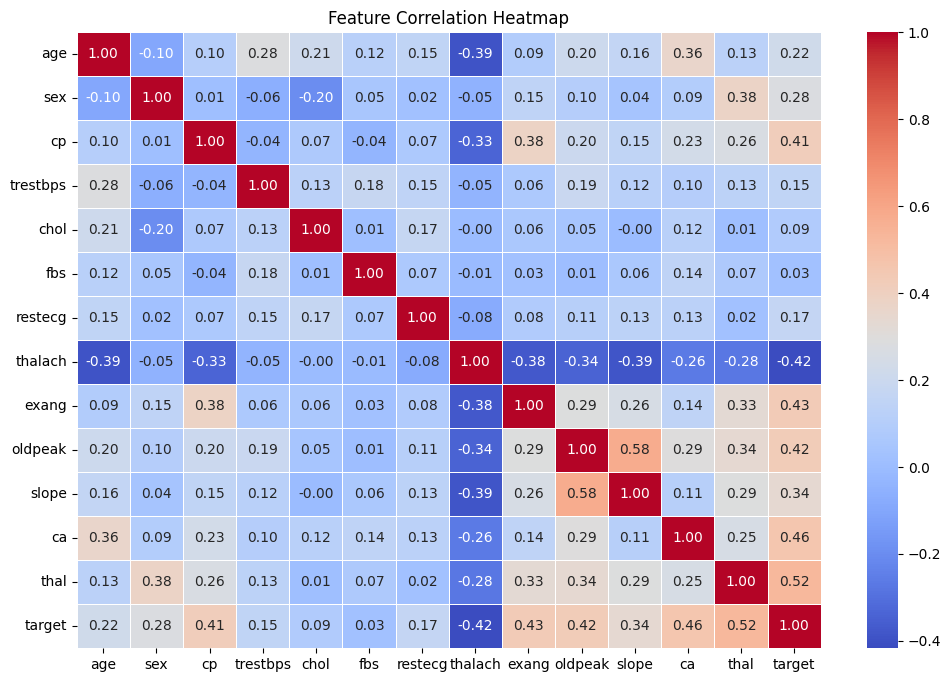

In [ ]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


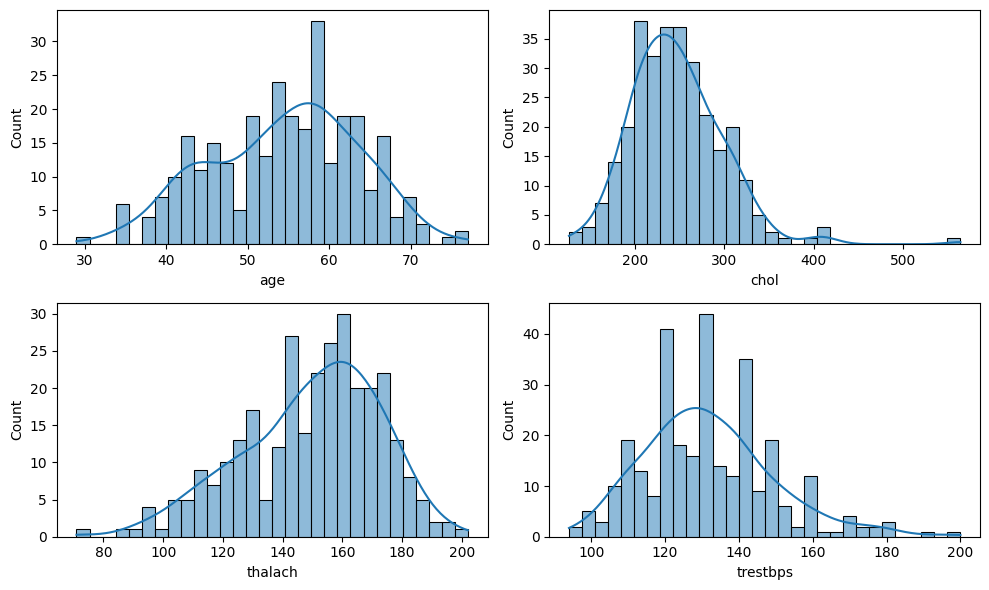

In [ ]:
# Select important numerical features
features = ["age", "chol", "thalach", "trestbps"]

# Plot distribution
plt.figure(figsize=(10, 6))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


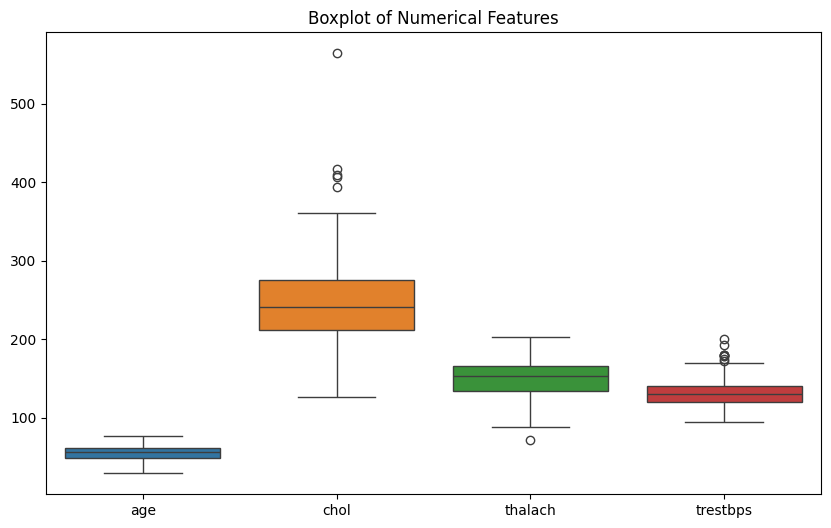

In [ ]:
# Boxplot for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["age", "chol", "thalach", "trestbps"]])
plt.title("Boxplot of Numerical Features")
plt.show()


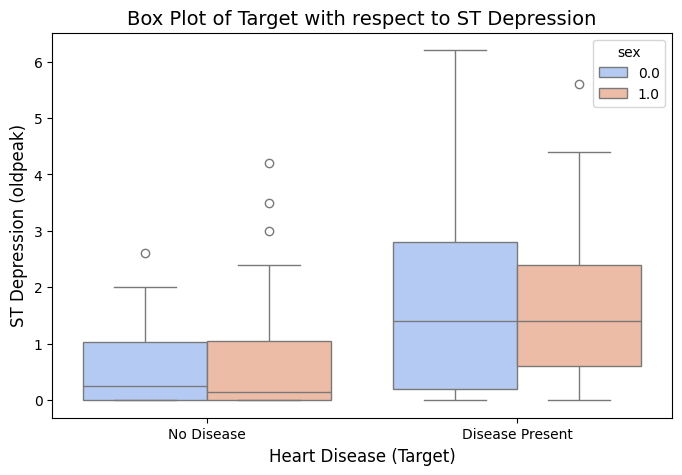

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["target"], y=df["oldpeak"], hue=df["sex"], palette="coolwarm")

# Set labels and title
plt.xlabel("Heart Disease (Target)", fontsize=12)
plt.ylabel("ST Depression (oldpeak)", fontsize=12)
plt.title("Box Plot of Target with respect to ST Depression", fontsize=14)

# Customize x-axis labels
plt.xticks([0, 1], ["No Disease", "Disease Present"])

# Show the plot
plt.show()


In [ ]:
# Count total patients
total_patients = df.shape[0]

# Count the number of patients with and without heart disease
count_no_disease = df[df["target"] == 0].shape[0]
count_disease = df[df["target"] == 1].shape[0]

# Calculate percentages
percent_no_disease = (count_no_disease / total_patients) * 100
percent_disease = (count_disease / total_patients) * 100

# Print the counts
print(f"Total number of patients: {total_patients}")
print(f"Number of patients without heart disease: {count_no_disease}")
print(f"Number of patients with heart disease: {count_disease}")

# Print the percentages
print(f"Percentage of patients without heart disease: {percent_no_disease:.2f}%")
print(f"Percentage of patients with heart disease: {percent_disease:.2f}%")


Total number of patients: 303
Number of patients without heart disease: 164
Number of patients with heart disease: 139
Percentage of patients without heart disease: 54.13%
Percentage of patients with heart disease: 45.87%


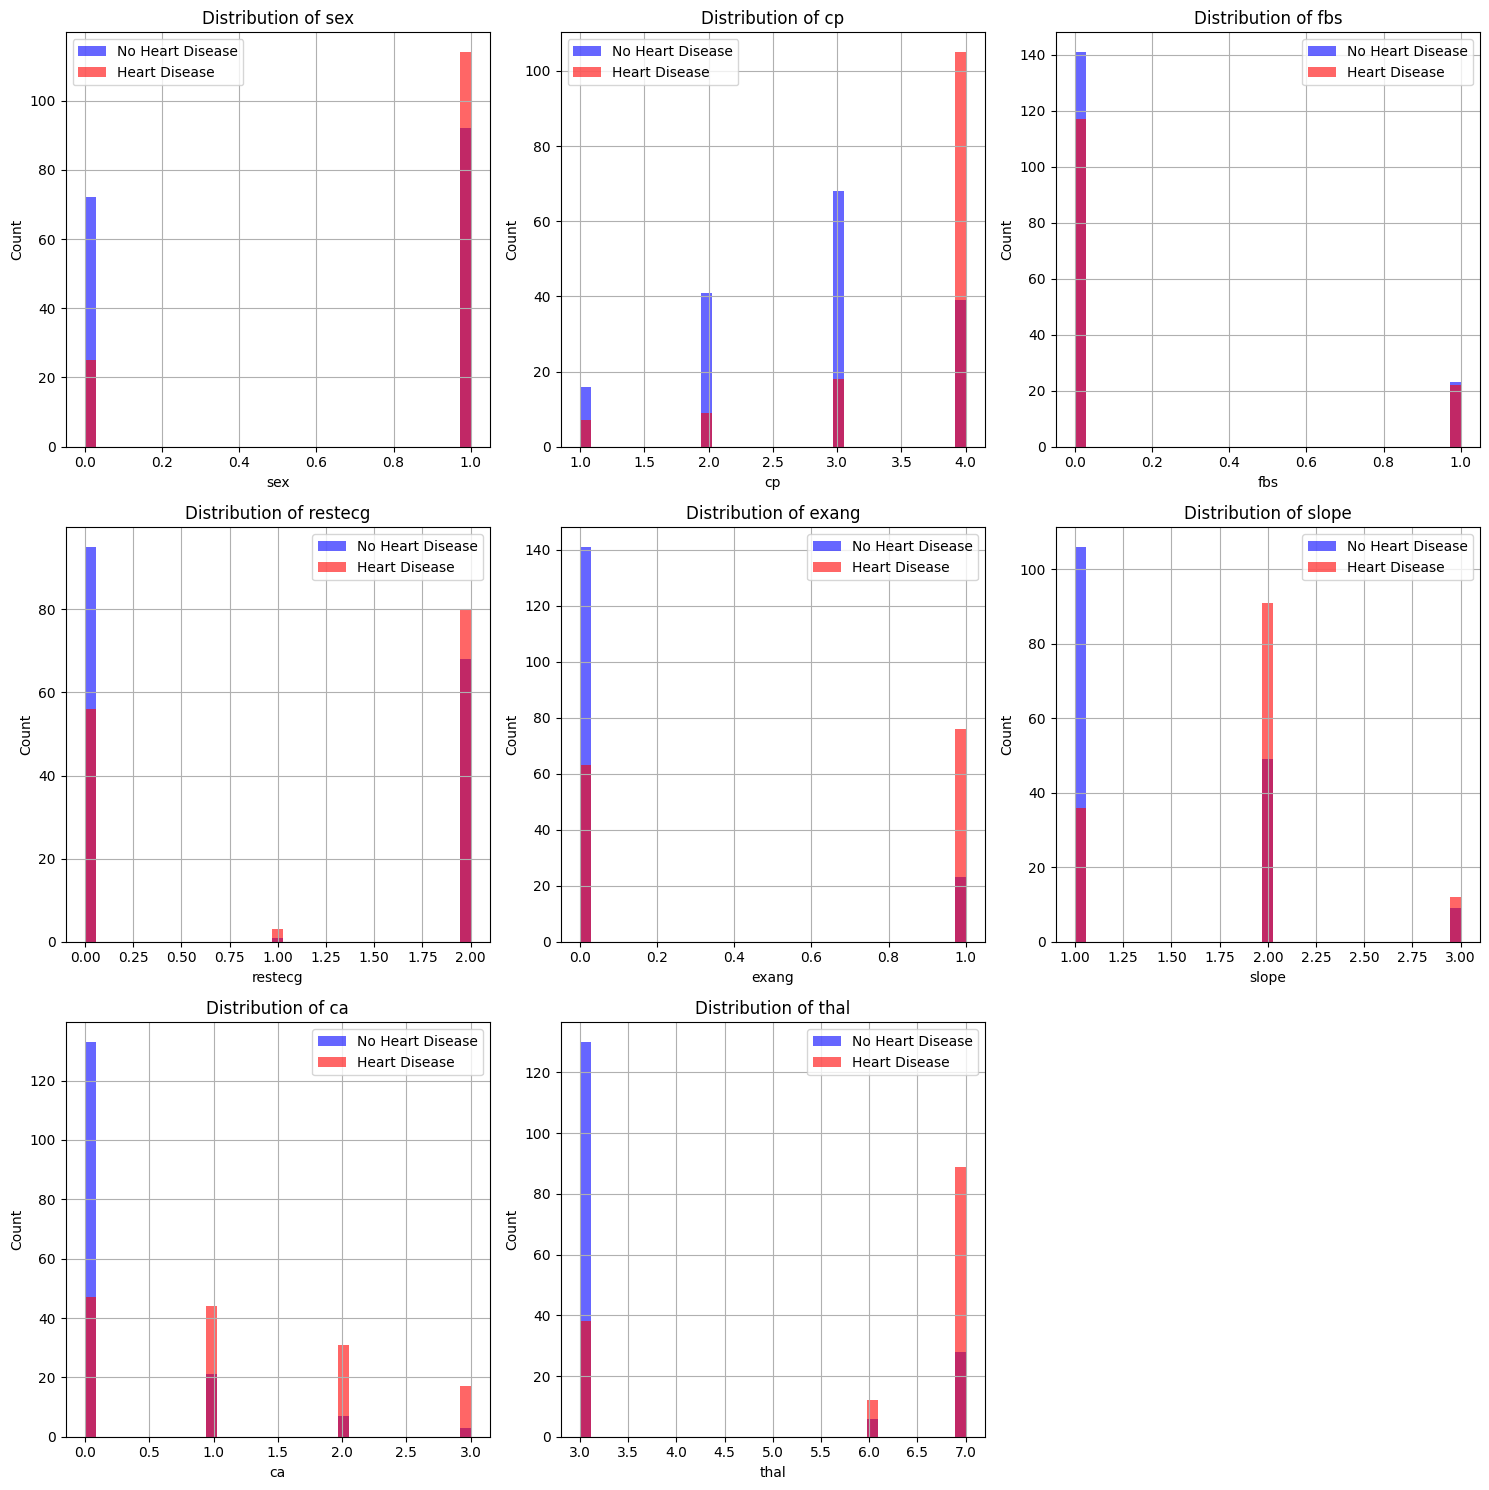

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
dataset = pd.read_csv(url, names=columns, na_values="?")

# Handle missing values
dataset.fillna(dataset.median(), inplace=True)

# Convert target to binary classification (0 = No disease, 1 = Disease)
dataset["target"] = dataset["target"].apply(lambda x: 1 if x > 0 else 0)

# Define categorical columns
categorical_val = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Visualization
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)

    dataset[dataset["target"] == 0][column].hist(
        bins=35, color='blue', label='No Heart Disease', alpha=0.6
    )
    dataset[dataset["target"] == 1][column].hist(
        bins=35, color='red', label='Heart Disease', alpha=0.6
    )

    plt.legend()
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


In [ ]:
# Splitting Features and Target
X = df.drop(columns=['target'])
y = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert to binary classification (0: No Disease, 1: Disease)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardizing the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import joblib

# Train Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# **Save the model & scaler to Google Drive**
model_path = "/content/drive/MyDrive/Model/random_forest_model.pkl"
scaler_path = "/content/drive/MyDrive/Model/scaler.pkl"

joblib.dump(rf_model, model_path)
joblib.dump(scaler, scaler_path)

print(f"Model saved in: {model_path}")
print(f"Scaler saved in: {scaler_path}")

Model saved in: /content/drive/MyDrive/Model/random_forest_model.pkl
Scaler saved in: /content/drive/MyDrive/Model/scaler.pkl


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import joblib

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Accuracy scores
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf) * 100
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf) * 100

# Save model using joblib
joblib.dump(rf_model, "random_forest_model.pkl")

# Print results
print("Random Forest model trained and saved successfully!")
print(f"Random Forest Accuracy (Training Data): {train_accuracy_rf:.2f}%")
print(f"Random Forest Accuracy (Test Data): {test_accuracy_rf:.2f}%")


Random Forest model trained and saved successfully!
Random Forest Accuracy (Training Data): 100.00%
Random Forest Accuracy (Test Data): 90.16%


In [ ]:
from sklearn.metrics import confusion_matrix

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:\n", cm_rf)

Confusion Matrix - Random Forest:
 [[27  2]
 [ 4 28]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Initialize and train the SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

# Accuracy scores
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

# Print results
print(f"SVM Accuracy (Training Data): {train_accuracy_svm:.2%}")
print(f"SVM Accuracy (Test Data): {test_accuracy_svm:.2%}")


SVM Accuracy (Training Data): 90.08%
SVM Accuracy (Test Data): 90.16%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naïve Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)

# Accuracy scores
train_accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)

# Print results
print(f"Naïve Bayes Accuracy (Training Data): {train_accuracy_nb:.2%}")
print(f"Naïve Bayes Accuracy (Test Data): {test_accuracy_nb:.2%}")


Naïve Bayes Accuracy (Training Data): 84.71%
Naïve Bayes Accuracy (Test Data): 83.61%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Find the best random state for highest accuracy
max_accuracy = 0
best_random_state = 0

for random_state in range(200):
    dt = DecisionTreeClassifier(random_state=random_state)
    dt.fit(X_train, y_train)
    y_pred_test_dt = dt.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred_test_dt)

    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_random_state = random_state

# Train the final Decision Tree model with the best random state
dt = DecisionTreeClassifier(random_state=best_random_state)
dt.fit(X_train, y_train)

# Predictions
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Accuracy scores
train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)

# Print results
print(f"Decision Tree Accuracy (Training Data): {train_accuracy_dt:.2%}")
print(f"Decision Tree Accuracy (Test Data): {test_accuracy_dt:.2%}")
print(f"Best Random State: {best_random_state}")


Decision Tree Accuracy (Training Data): 100.00%
Decision Tree Accuracy (Test Data): 77.05%
Best Random State: 9


In [ ]:
pip install seaborn


In [ ]:
pip install matplotlib


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



<ipython-input-30-8649617097fb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="pastel")


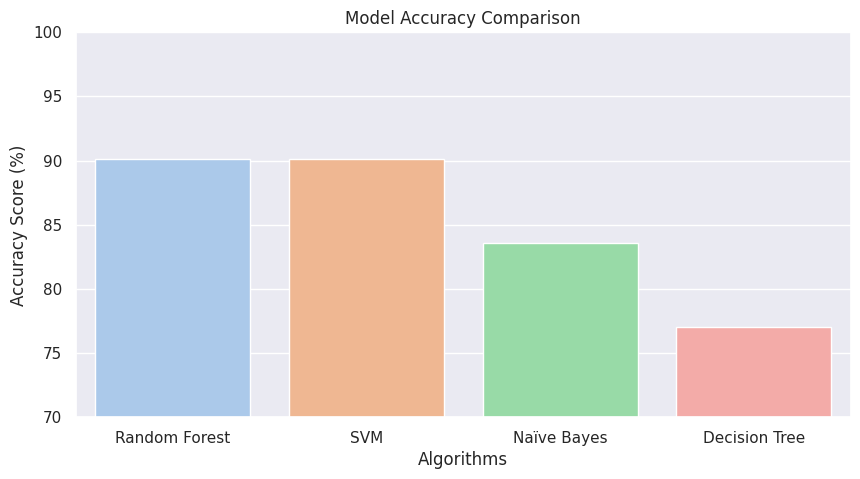

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Models and their Test Accuracies
models = ["Random Forest", "SVM", "Naïve Bayes", "Decision Tree"]
accuracies = [90.16, 90.16, 83.61, 77.05]  # from your result table

# Plot
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
sns.barplot(x=models, y=accuracies, palette="pastel")
plt.title("Model Accuracy Comparison")
plt.ylim(70, 100)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print results
print(f"Logistic Regression Accuracy (Training Data): {train_accuracy:.2%}")
print(f"Logistic Regression Accuracy (Test Data): {test_accuracy:.2%}\n")




Logistic Regression Accuracy (Training Data): 83.88%
Logistic Regression Accuracy (Test Data): 88.52%



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predictions
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# Accuracy scores
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

# Print results
print(f"K-Nearest Neighbors Accuracy (Training Data): {train_accuracy_knn:.2%}")
print(f"K-Nearest Neighbors Accuracy (Test Data): {test_accuracy_knn:.2%}\n")




K-Nearest Neighbors Accuracy (Training Data): 83.88%
K-Nearest Neighbors Accuracy (Test Data): 86.89%



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Accuracy scores
train_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

# Print results
print(f"XGBoost Classifier Accuracy (Training Data): {train_accuracy_xgb:.2%}")
print(f"XGBoost Classifier Accuracy (Test Data): {test_accuracy_xgb:.2%}\n")



XGBoost Classifier Accuracy (Training Data): 100.00%
XGBoost Classifier Accuracy (Test Data): 86.89%



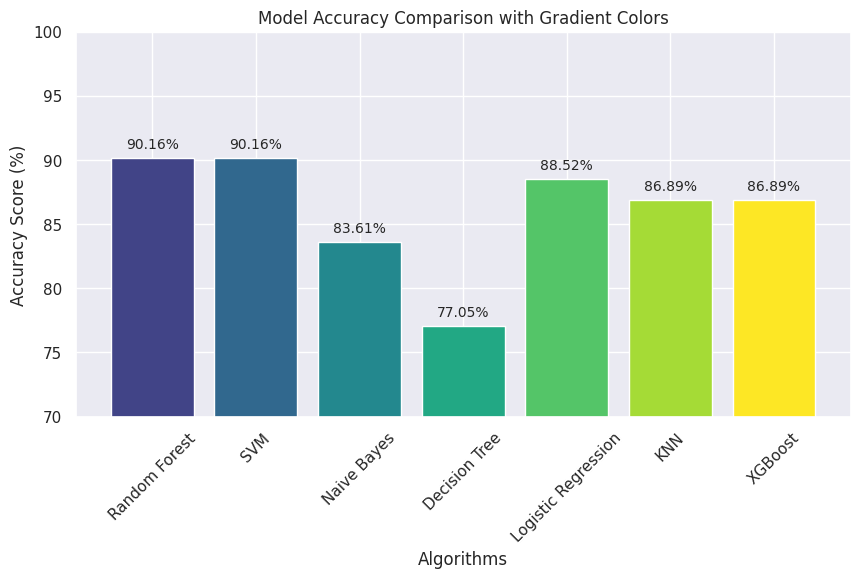

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and Test Accuracies
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree',
          'Logistic Regression', 'KNN', 'XGBoost']
accuracies = [90.16, 90.16, 83.61, 77.05, 88.52, 86.89, 86.89]

# Create figure
plt.figure(figsize=(10, 5))

# Normalize colors based on accuracy values
colors = plt.cm.viridis(np.linspace(0.2, 1, len(models)))

# Plot bars with gradient colors
bars = plt.bar(models, accuracies, color=colors)

# Add value labels on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
plt.title("Model Accuracy Comparison with Gradient Colors")
plt.xticks(rotation=45)
plt.ylim(70, 100)  # Zoom between 70% and 100%

plt.show()


In [ ]:
!pip install flask-ngrok


In [ ]:
!pip install pyngrok

In [ ]:
!cat /root/.config/ngrok/ngrok.yml

region: us
version: '2'
authtoken: 2ugENFoYpOUqlId6FwgaFUwTY3U_4q8ReC1xG7p8QrFrTLR23


In [ ]:

!ngrok config add-authtoken 2ugENFoYpOUqlId6FwgaFUwTY3U_4q8ReC1xG7p8QrFrTLR23

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, render_template, request
import numpy as np
import joblib
from pyngrok import ngrok  # Use pyngrok for better control

app = Flask(__name__)

# Load trained model and scaler
model_path = "/content/drive/MyDrive/Model/random_forest_model.pkl"
scaler_path = "/content/drive/MyDrive/Model/scaler.pkl"

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

@app.route("/")
def home():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    try:
        features = [float(request.form[key]) for key in request.form.keys()]
        features_scaled = scaler.transform([features])
        prediction = model.predict(features_scaled)[0]
        result = "Heart Disease Detected" if prediction == 1 else "No Heart Disease"
        return render_template("result.html", result=result)
    except Exception as e:
        return str(e)

if __name__ == "__main__":
    # Start ngrok tunnel
    public_url = ngrok.connect(5000)
    print(f"🔗 Public URL: {public_url}")

    # Run Flask App
    app.run(port=5000)


🔗 Public URL: NgrokTunnel: "https://dce9-34-75-194-190.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [03/Apr/2025 05:19:30] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Apr/2025 05:19:31] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [03/Apr/2025 05:21:55] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [03/Apr/2025 05:22:25] "POST /predict HTTP/1.1" 200 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does